In [1]:
# !wget https://ucdp.uu.se/downloads/ged/ged201-csv.zip
# !wget file.prio.no/ReplicationData/PRIO-GRID/priogrid_shapefiles.zip

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import pickle

In [3]:
prio_grid = gpd.read_file("zip://priogrid_shapefiles.zip")
ucdp = pd.read_csv("ged201-csv.zip")

/home/polichinel/anaconda3/envs/geo_env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Visualization

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
# %matplotlib notebook

In [6]:
print(prio_grid['xcoord'].max())
print(prio_grid['xcoord'].min())
print(prio_grid['ycoord'].max())
print(prio_grid['ycoord'].min())

179.75
-179.75
89.75
-89.75


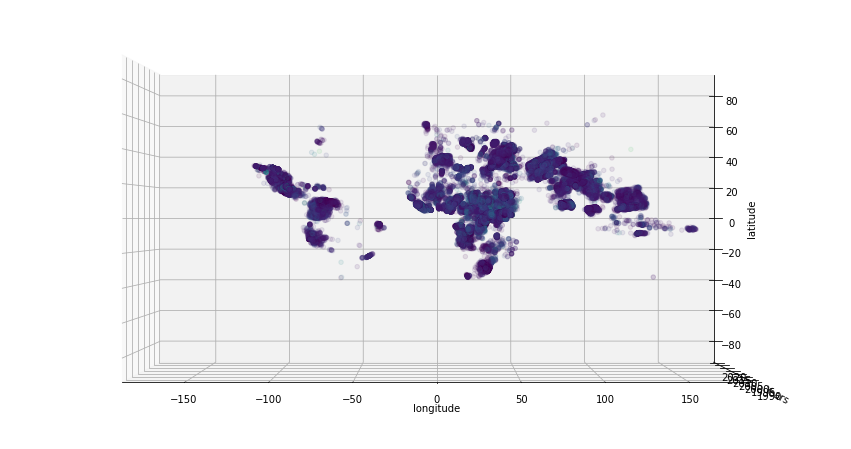

In [7]:
fig = plt.figure(figsize = [15,8])
ax = plt.axes(projection="3d")

x = ucdp['longitude'] # -180 - 180
z = ucdp['latitude'] # -90 - 90
y = ucdp['year']
c = np.log(ucdp['best']+1)

ax.scatter(x,y,z, c=c, alpha = 0.1)
ax.set_xlabel('longitude')
ax.set_ylabel('Years')
ax.set_zlabel('latitude')

ax.set_zlim(-90, 90)
ax.set_xlim(-180, 180)

ax.view_init(elev=0, azim=-90)
ax.dist=8

plt.show()

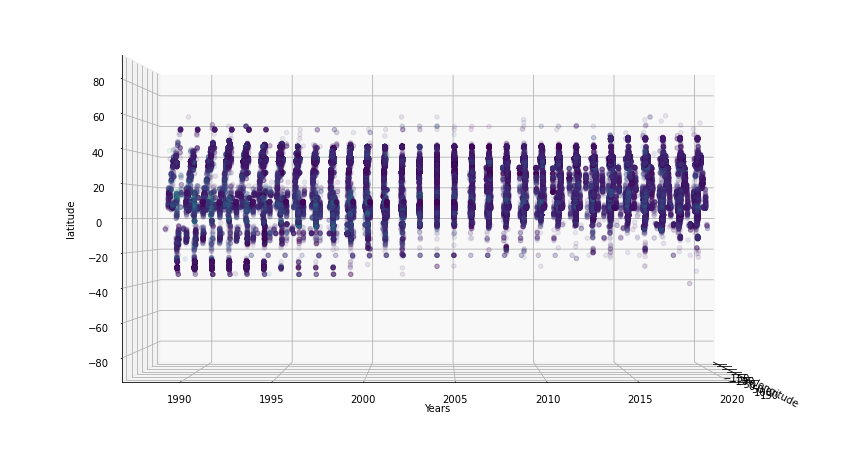

In [8]:
fig = plt.figure(figsize = [15,8])
ax = plt.axes(projection="3d")

x = ucdp['longitude'] # -180 - 180
z = ucdp['latitude'] # -90 - 90
y = ucdp['year']
c = np.log(ucdp['best']+1)

ax.scatter(x,y,z, c=c, alpha = 0.1)
ax.set_xlabel('longitude')
ax.set_ylabel('Years')
ax.set_zlabel('latitude')

ax.set_zlim(-90, 90)
ax.set_xlim(-180, 180)

ax.view_init(elev=0, azim=0)
ax.dist=8

plt.show()

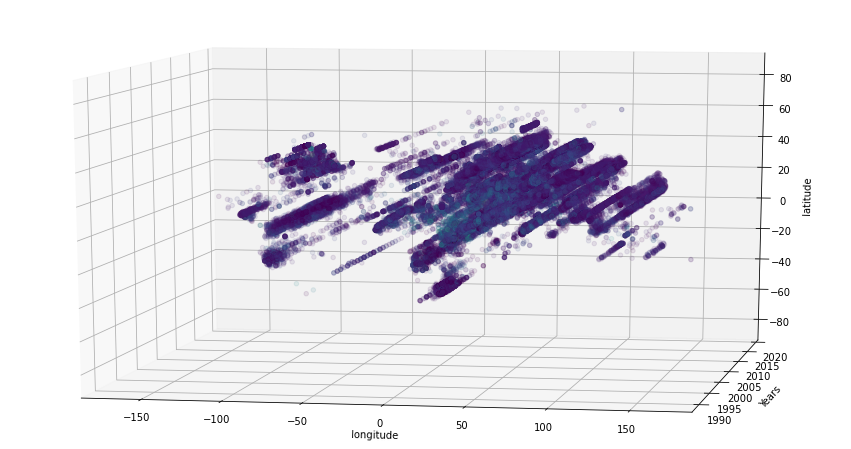

In [9]:
fig = plt.figure(figsize = [15,8])
ax = plt.axes(projection="3d")

x = ucdp['longitude'] # -180 - 180
z = ucdp['latitude'] # -90 - 90
y = ucdp['year']
c = np.log(ucdp['best']+1)

ax.scatter(x,y,z, c=c, alpha = 0.1)
ax.set_xlabel('longitude')
ax.set_ylabel('Years')
ax.set_zlabel('latitude')

ax.set_zlim(-90, 90)
ax.set_xlim(-180, 180)

ax.view_init(elev=10, azim=-80)
ax.dist=8

plt.show()

# merge

In [10]:
ucdp_slim = ucdp[['year','priogrid_gid','best','low','high']]
ucdp_gid = ucdp_slim.groupby(by=['priogrid_gid','year']).sum().reset_index()
ucdp_gid.rename(columns={'priogrid_gid':'gid'}, inplace=True)

ucdp_gid['log_best'] = np.log(ucdp_gid['best'] +1)
ucdp_gid['log_low'] = np.log(ucdp_gid['low'] +1)
ucdp_gid['log_high'] = np.log(ucdp_gid['high'] +1)

In [11]:
def elong_df(df, df_w_years):

    years = sorted(df_w_years['year'].unique())
    df['year'] = years[0]
    concat_df = df.copy()

    for i,j in enumerate(years[1:]):

        df_temp = df.copy()
        df_temp['year'] = j

        concat_df = pd.concat([concat_df,df_temp])
    
    concat_df.reset_index(inplace = True)
    return(concat_df)

In [12]:
prio_grid_yearly = elong_df(prio_grid,ucdp_gid)

In [13]:
grid_ucdp =  pd.merge(prio_grid_yearly, ucdp_gid, how = 'left', on = ['gid', 'year'])

In [14]:
grid_ucdp.fillna({'best' : 0, 'low' : 0, 'high' : 0, 'log_best' : 0, 'log_low' : 0, 'log_high' : 0}, inplace = True)

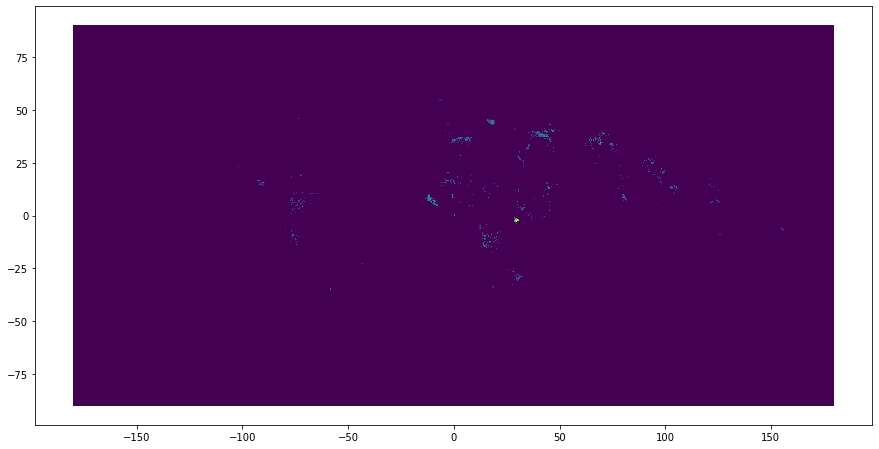

In [15]:
grid_ucdp[grid_ucdp['year'] == 1994].plot(column = 'log_best', figsize=(15, 15))
plt.show()

In [16]:
grid_ucdp_geo = grid_ucdp.copy() # keep for testing futher down
grid_ucdp = grid_ucdp[['gid', 'xcoord', 'ycoord', 'year', 'best', 'low', 'high', 'log_best', 'log_low', 'log_high']].copy() # remove the everything also the geo col.

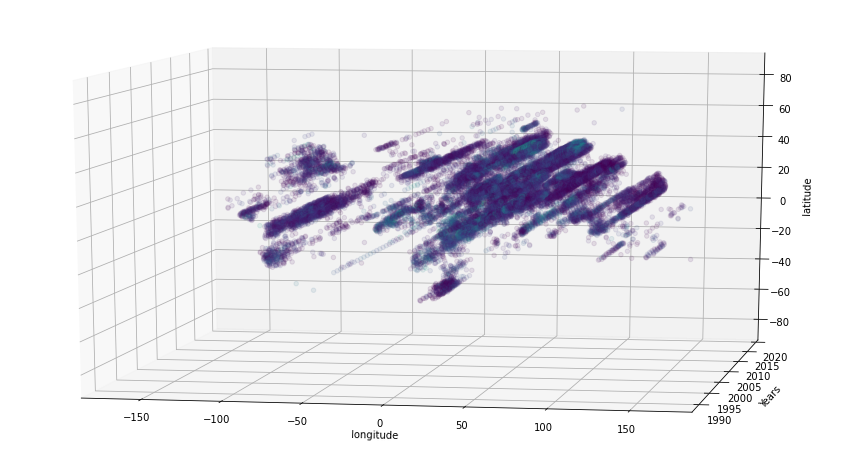

In [17]:
fig = plt.figure(figsize = [15,8])
ax = plt.axes(projection="3d")

x = grid_ucdp[grid_ucdp['log_best'] > 0]['xcoord'] # -180 - 180
z = grid_ucdp[grid_ucdp['log_best'] > 0]['ycoord'] # -90 - 90
y = grid_ucdp[grid_ucdp['log_best'] > 0]['year']
c = grid_ucdp[grid_ucdp['log_best'] > 0]['log_best']

ax.scatter(x,y,z, c=c, alpha = 0.1)
ax.set_xlabel('longitude')
ax.set_ylabel('Years')
ax.set_zlabel('latitude')

ax.set_zlim(-90, 90)
ax.set_xlim(-180, 180)

ax.view_init(elev=10, azim=-80)
ax.dist=8

plt.show()

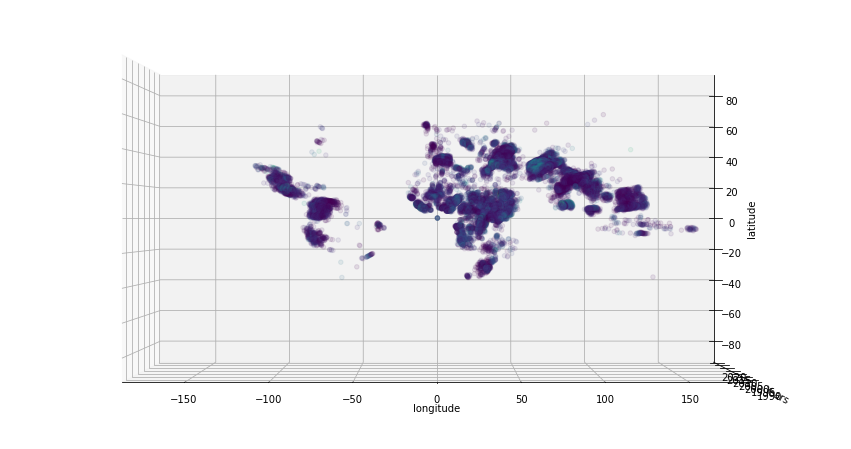

In [18]:
fig = plt.figure(figsize = [15,8])
ax = plt.axes(projection="3d")

x = grid_ucdp[grid_ucdp['log_best'] > 0]['xcoord'] # -180 - 180
z = grid_ucdp[grid_ucdp['log_best'] > 0]['ycoord'] # -90 - 90
y = grid_ucdp[grid_ucdp['log_best'] > 0]['year']
c = grid_ucdp[grid_ucdp['log_best'] > 0]['log_best']

ax.scatter(x,y,z, c=c, alpha = 0.1)
ax.set_xlabel('longitude')
ax.set_ylabel('Years')
ax.set_zlabel('latitude')

ax.set_zlim(-90, 90)
ax.set_xlim(-180, 180)

ax.view_init(elev=0, azim=-90)
ax.dist=8

plt.show()

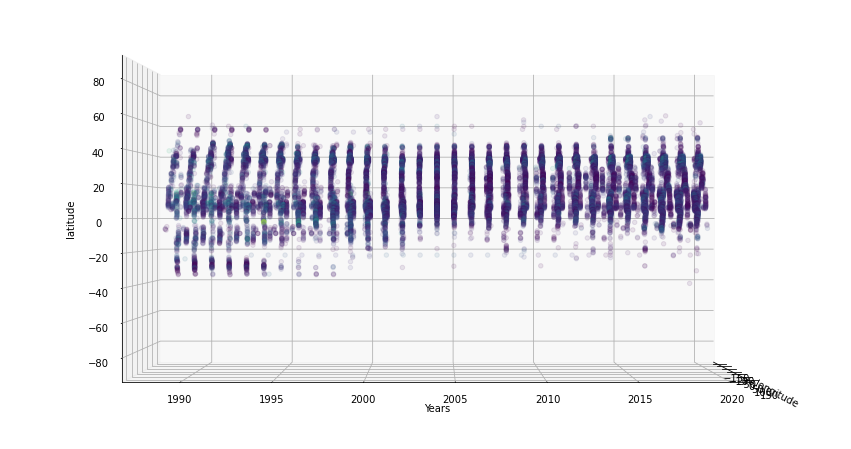

In [19]:
fig = plt.figure(figsize = [15,8])
ax = plt.axes(projection="3d")

x = grid_ucdp[grid_ucdp['log_best'] > 0]['xcoord'] # -180 - 180
z = grid_ucdp[grid_ucdp['log_best'] > 0]['ycoord'] # -90 - 90
y = grid_ucdp[grid_ucdp['log_best'] > 0]['year']
c = grid_ucdp[grid_ucdp['log_best'] > 0]['log_best']

ax.scatter(x,y,z, c=c, alpha = 0.1)
ax.set_xlabel('longitude')
ax.set_ylabel('Years')
ax.set_zlabel('latitude')

ax.set_zlim(-90, 90)
ax.set_xlim(-180, 180)

ax.view_init(elev=0, azim=0)
ax.dist=8

plt.show()

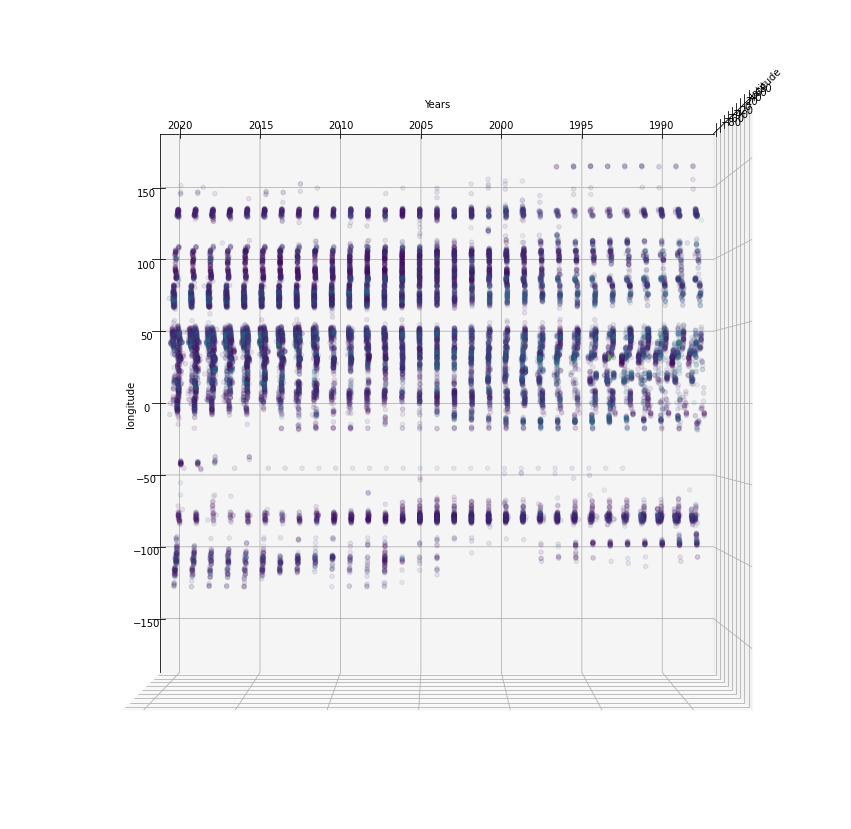

In [20]:
fig = plt.figure(figsize = [15,15])
ax = plt.axes(projection="3d")

x = grid_ucdp[grid_ucdp['log_best'] > 0]['xcoord'] # -180 - 180
z = grid_ucdp[grid_ucdp['log_best'] > 0]['ycoord'] # -90 - 90
y = grid_ucdp[grid_ucdp['log_best'] > 0]['year']
c = grid_ucdp[grid_ucdp['log_best'] > 0]['log_best']

ax.scatter(x,y,z, c=c, alpha = 0.1)
ax.set_xlabel('longitude')
ax.set_ylabel('Years')
ax.set_zlabel('latitude')

ax.set_zlim(-90, 90)
ax.set_xlim(-180, 180)

ax.view_init(elev=90, azim=180)
ax.dist=8

plt.show()

In [21]:
file_name = "ucpd_grid.pkl"
output = open(file_name, 'wb')
pickle.dump(grid_ucdp, output)
output.close()

# reshape

In [21]:
grid_ucdpS = grid_ucdp.sort_values(['year', 'ycoord', 'xcoord'], ascending = [True, False, True])

In [22]:
grid_ucdpS = grid_ucdpS[['gid','best', 'low',  'high', 'log_best', 'log_low', 'log_high']].copy() # remove the everything also the geo col. But keep gid. Why not.

In [23]:
x_dim = grid_ucdp['xcoord'].unique().shape[0]
y_dim = grid_ucdp['ycoord'].unique().shape[0]
z_dim = grid_ucdp['year'].unique().shape[0]

# new_grid_ucdp = np.array(grid_ucdp).reshape((z_dim, y_dim, x_dim, -1))# looks like something # plt.imshow(new_grid_ucdp[5,:,:,8])
new_grid_ucdp = np.array(grid_ucdpS).reshape((z_dim, y_dim, x_dim, -1))# look from above # plt.imshow(new_grid_ucdp[:,5,:,8])



# new_grid_ucdp = np.array(grid_ucdp).reshape((-1, z_dim, y_dim, x_dim))


In [24]:
new_grid_ucdp.shape

(31, 360, 720, 7)

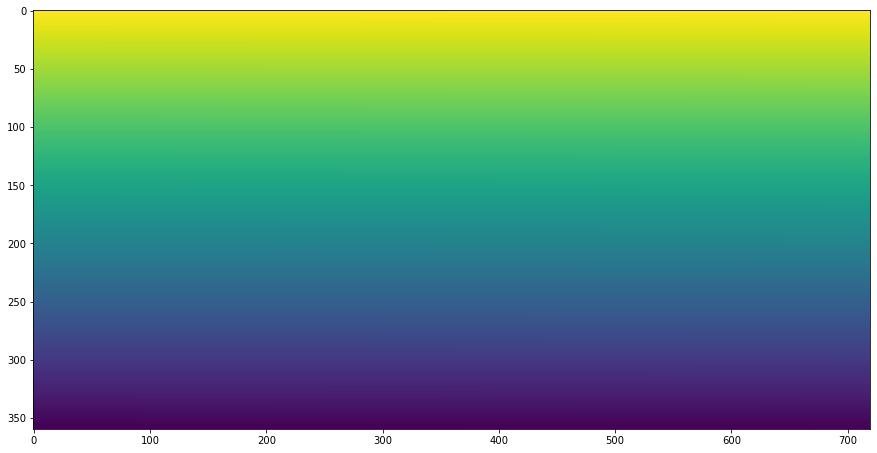

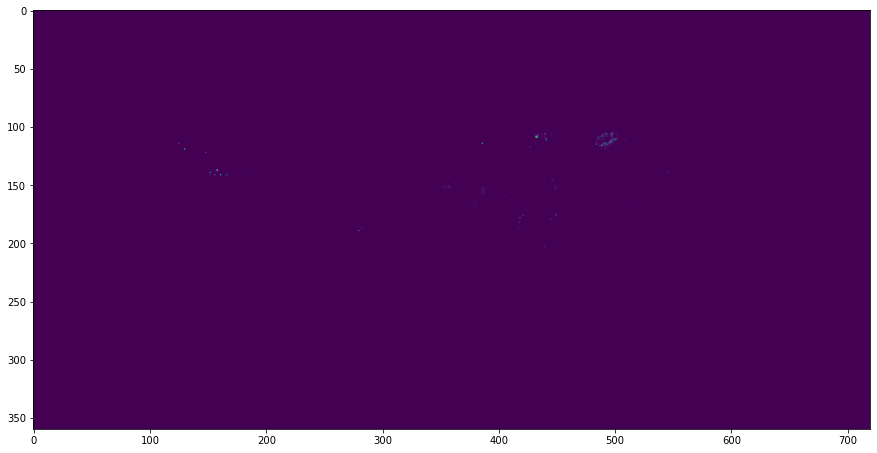

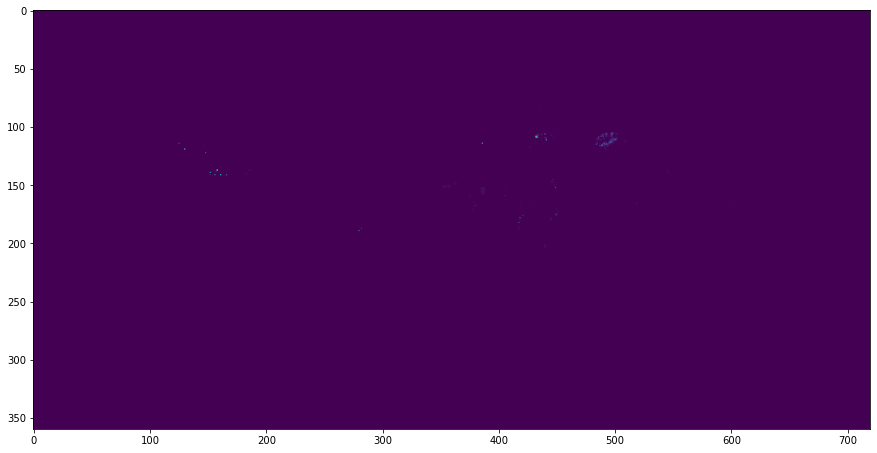

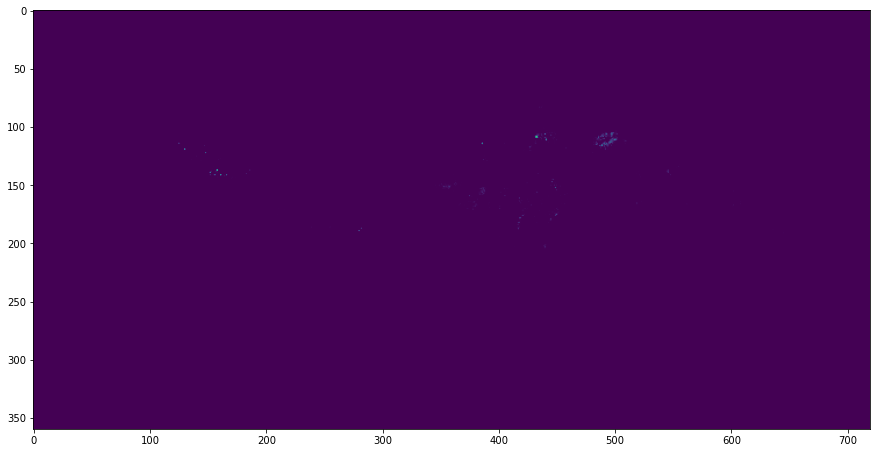

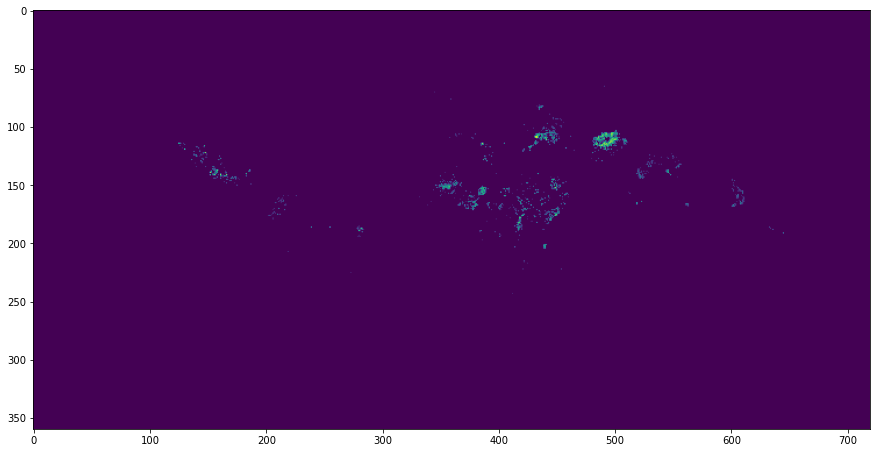

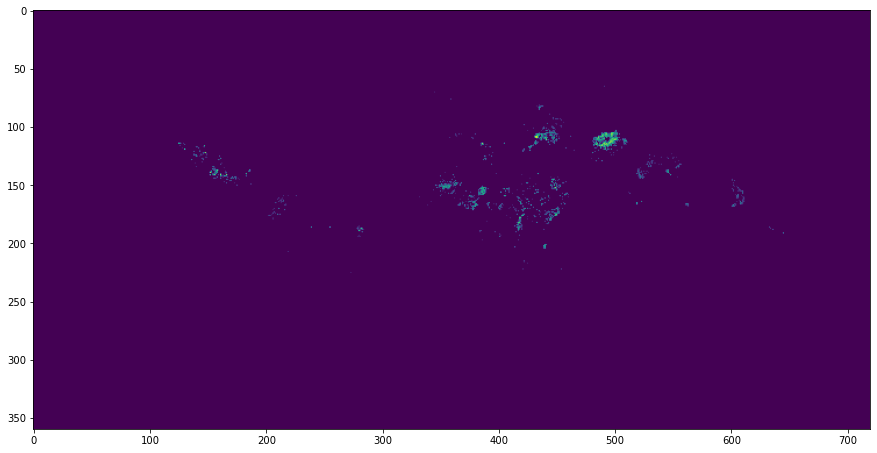

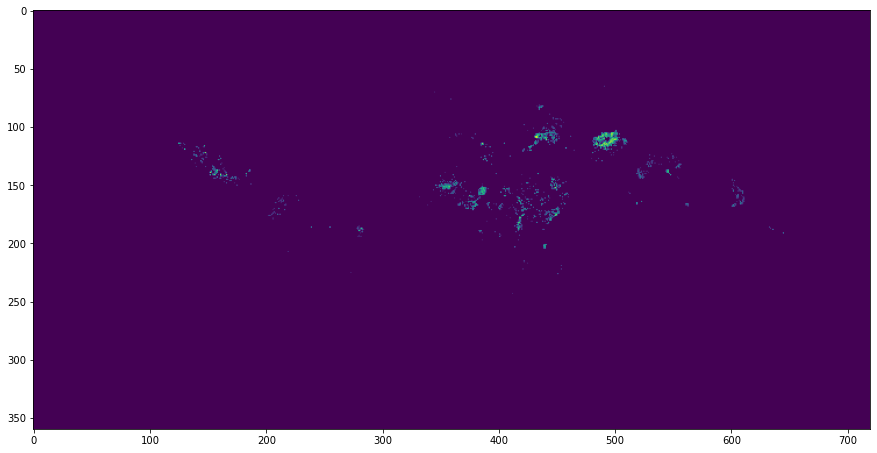

In [25]:
for i in np.arange(new_grid_ucdp.shape[3]):

    plt.figure(figsize = [15,15])
    plt.imshow(new_grid_ucdp[30,:,:,i]) # 30 er 2019, 6 is log best
    plt.show()

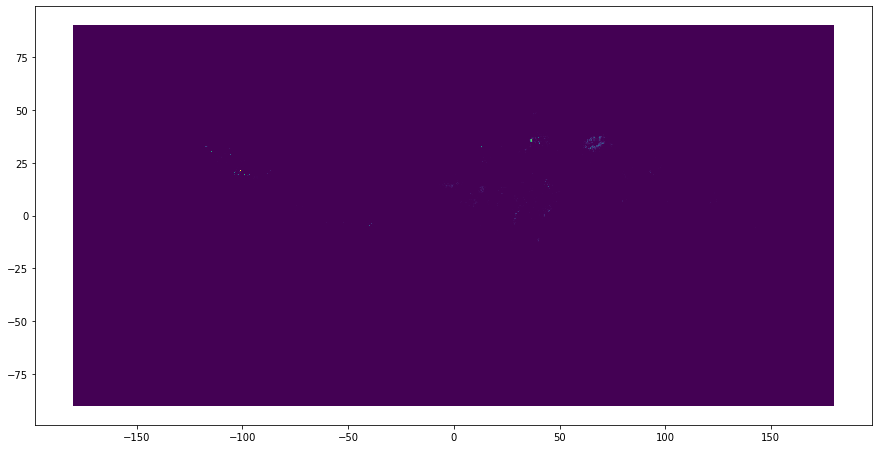

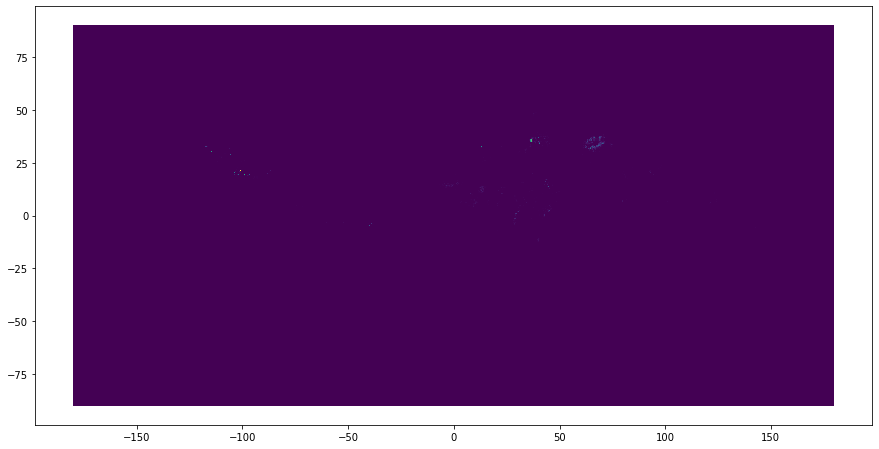

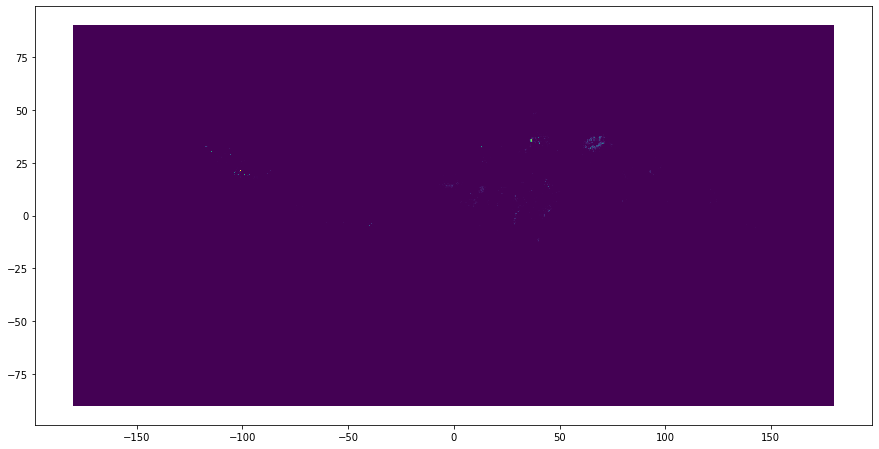

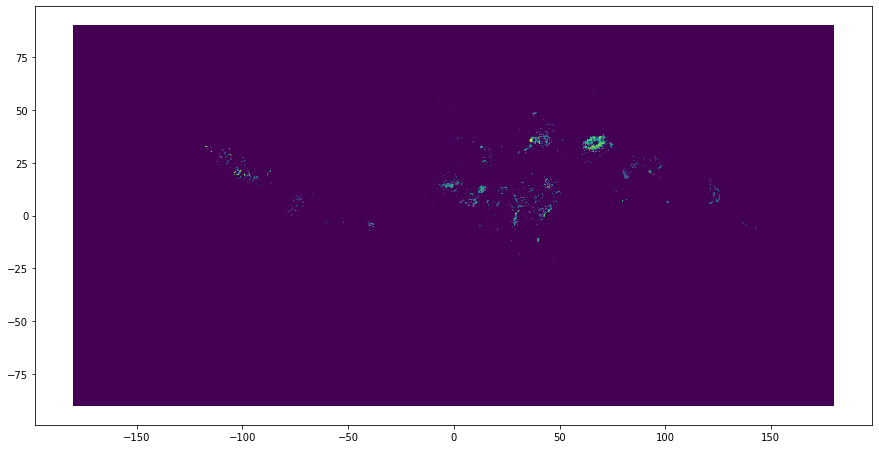

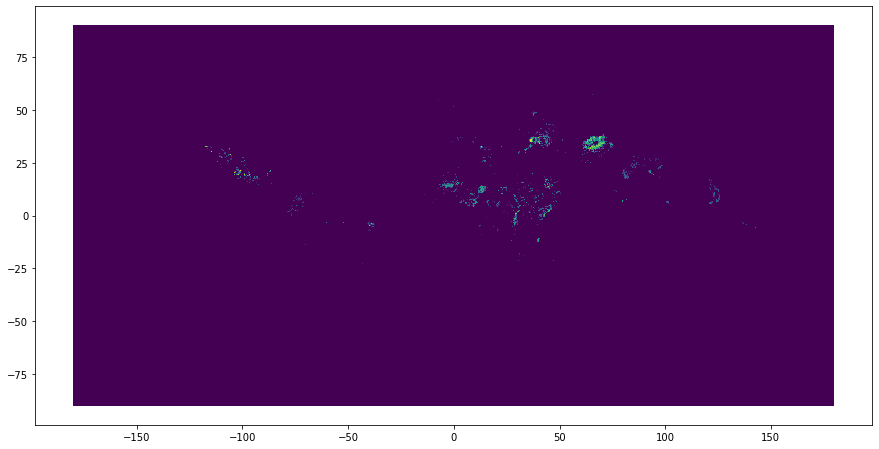

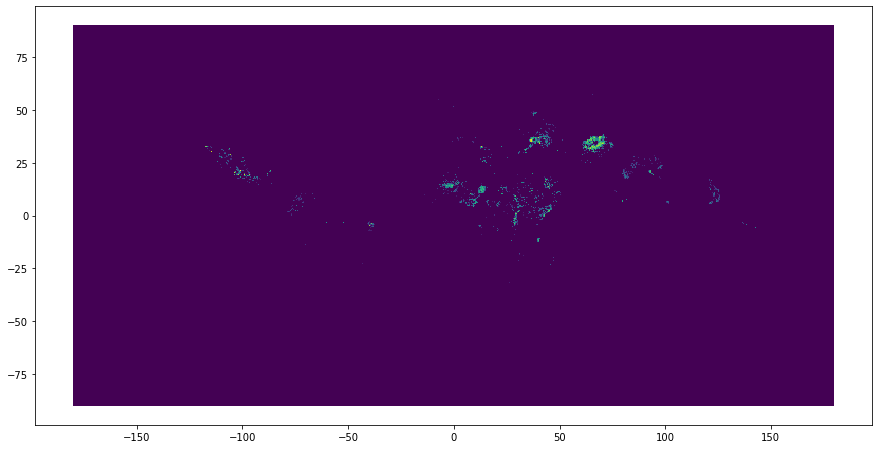

In [26]:
for i in ['best', 'low', 'high', 'log_best', 'log_low', 'log_high']:

    grid_ucdp_geo[grid_ucdp_geo['year'] == 2019].plot(column = i, figsize=(15, 15))
    plt.show()

# Pickle

In [28]:
file_name = "ucpd_vol.pkl"
output = open(file_name, 'wb')
pickle.dump(new_grid_ucdp, output)
output.close()

#### Test pickle

In [29]:
pkl_file = open('ucpd_vol.pkl', 'rb')
ucpd_vol = pickle.load(pkl_file)
pkl_file.close()

In [30]:
ucpd_vol.shape

(31, 360, 720, 7)

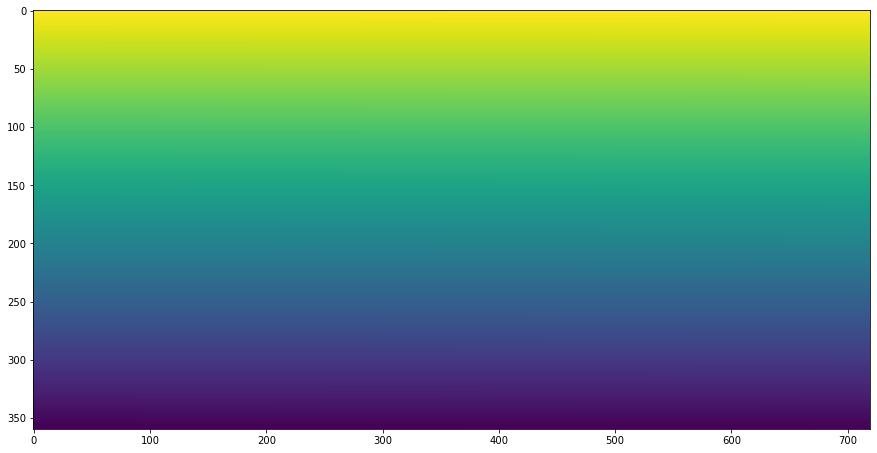

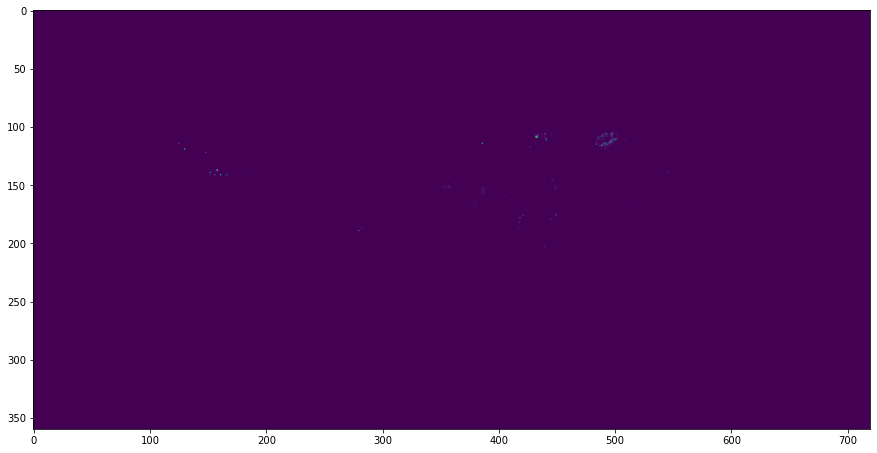

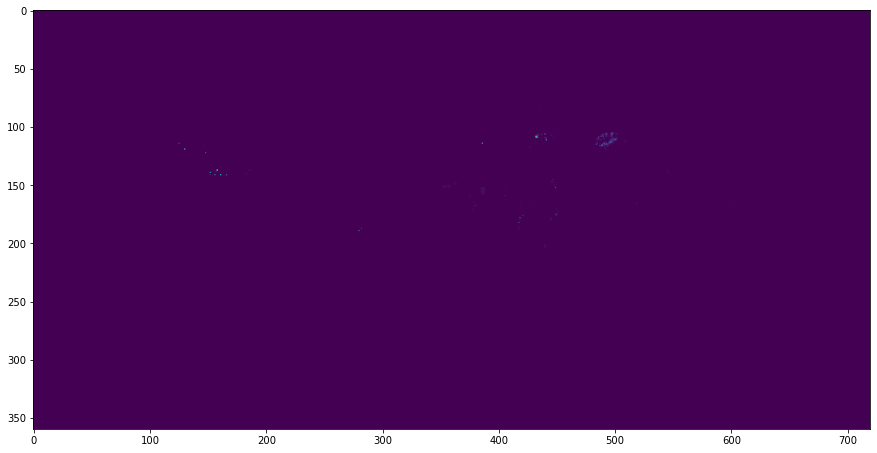

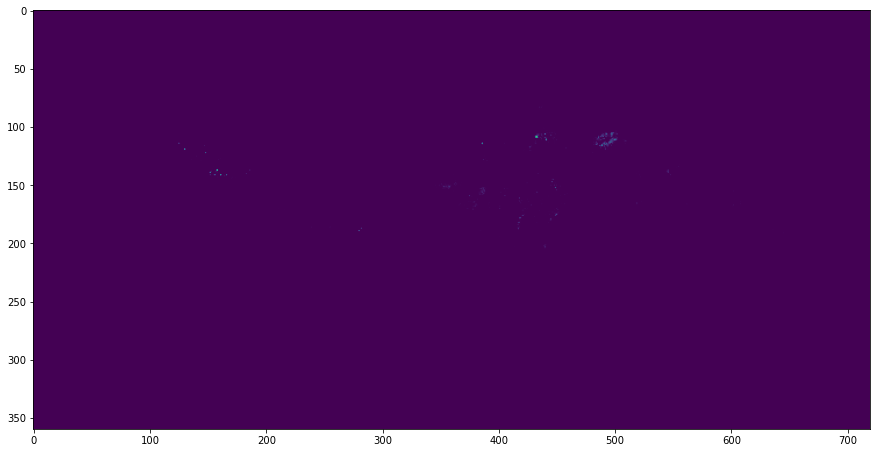

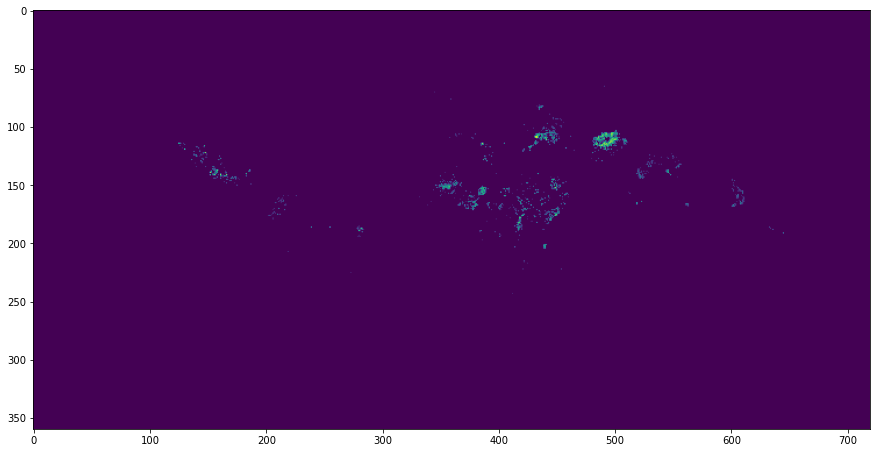

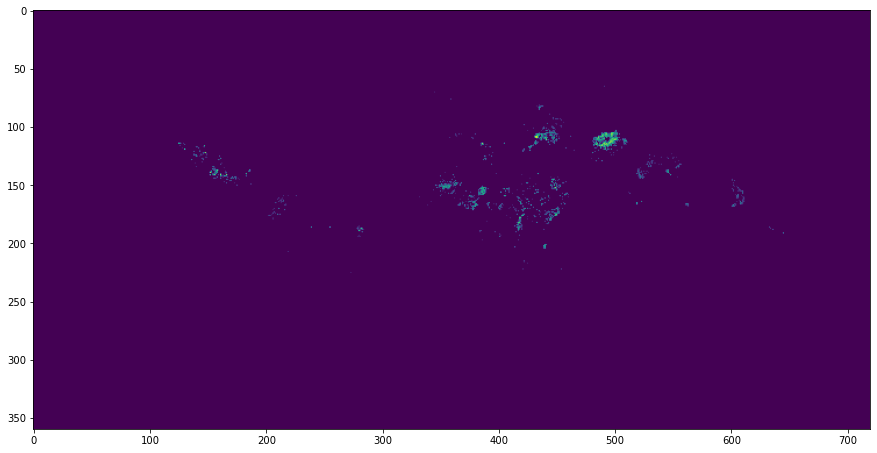

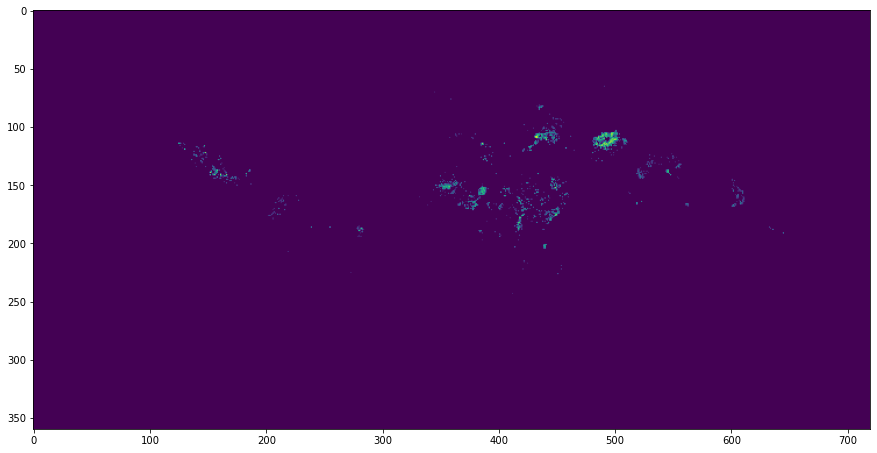

In [31]:
for i in np.arange(ucpd_vol.shape[3]):

    plt.figure(figsize = [15,15])
    plt.imshow(ucpd_vol[30,:,:,i]) # 30 er 2019, 6 is log best
    plt.show()

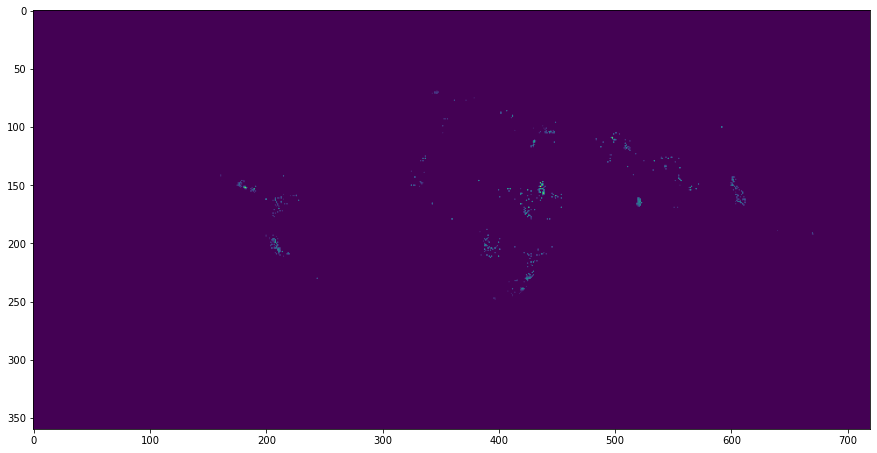

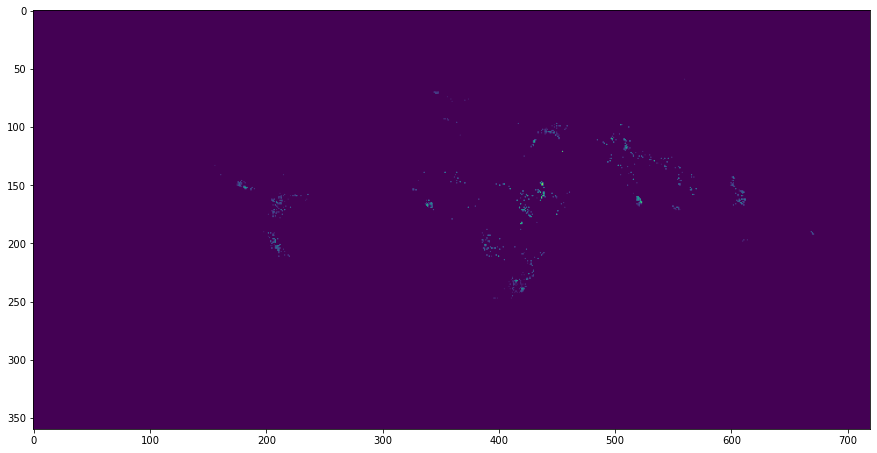

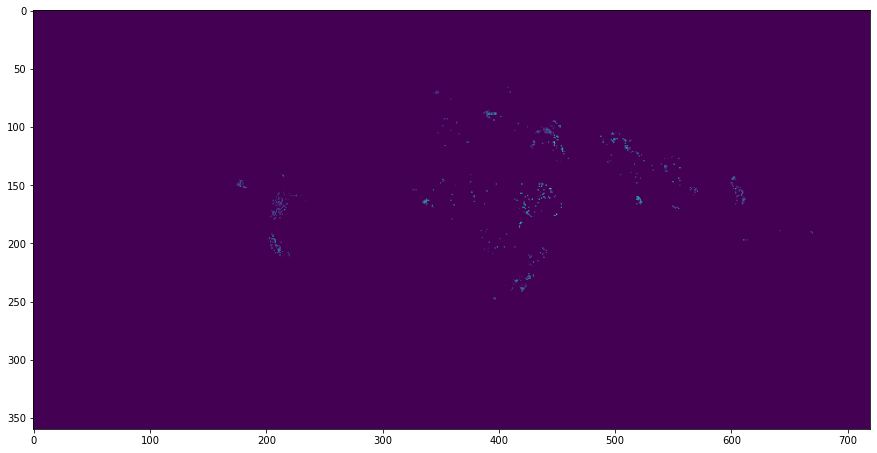

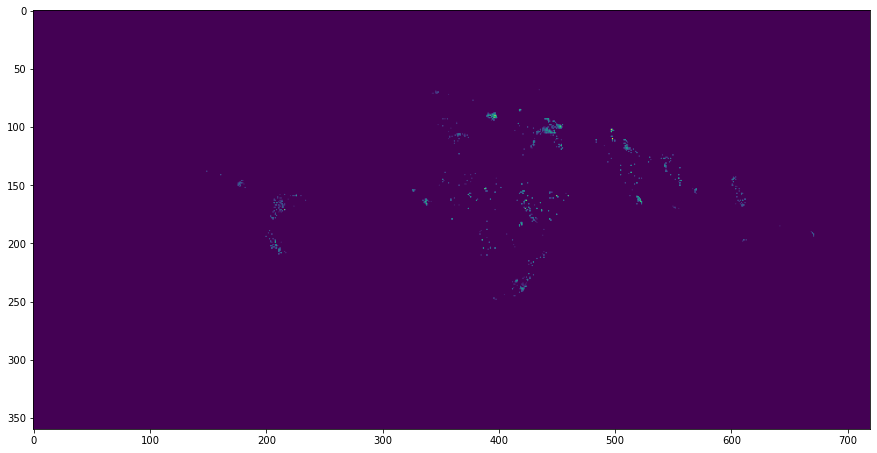

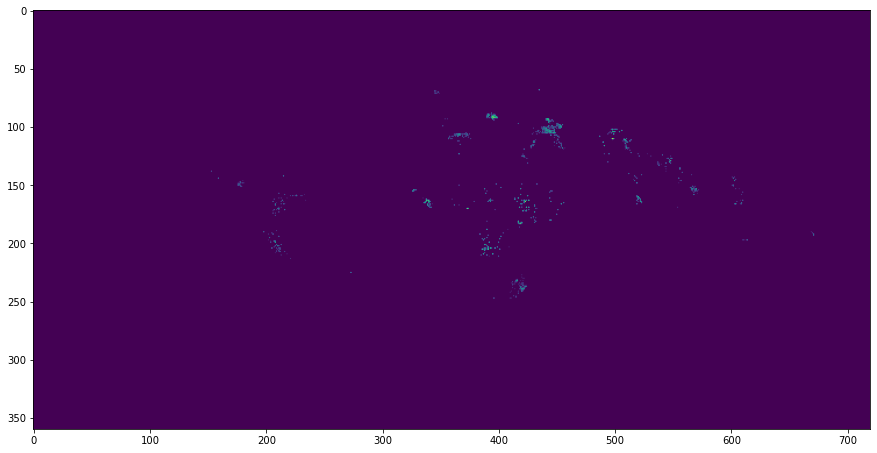

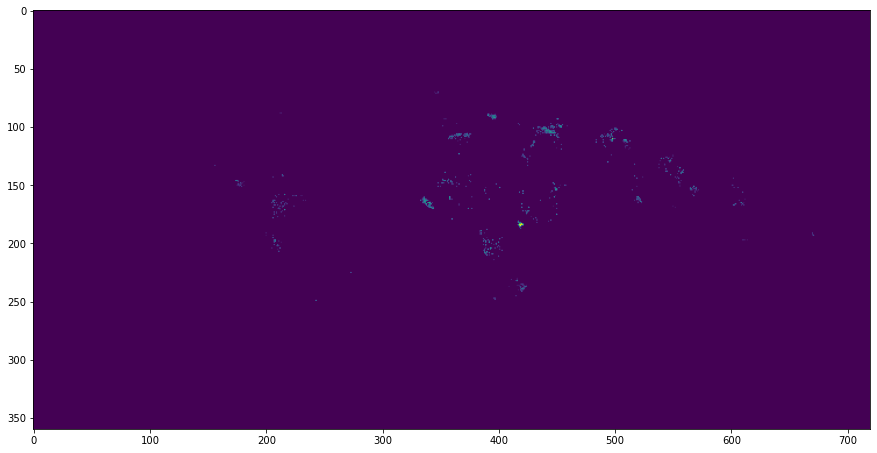

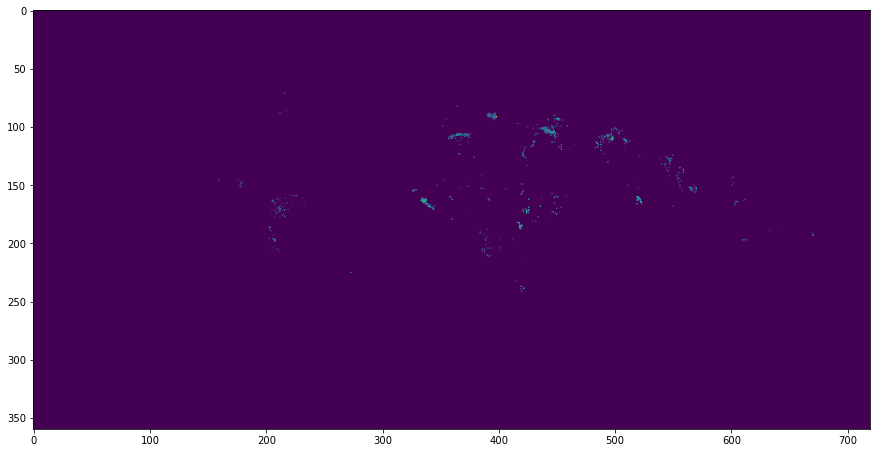

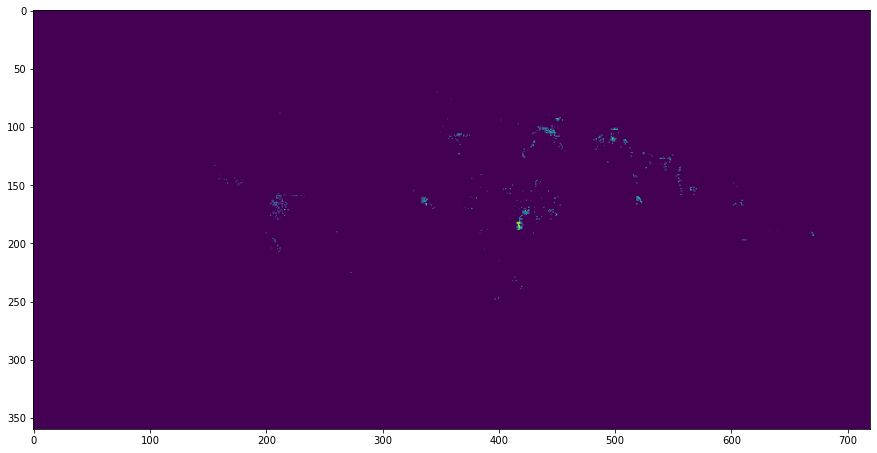

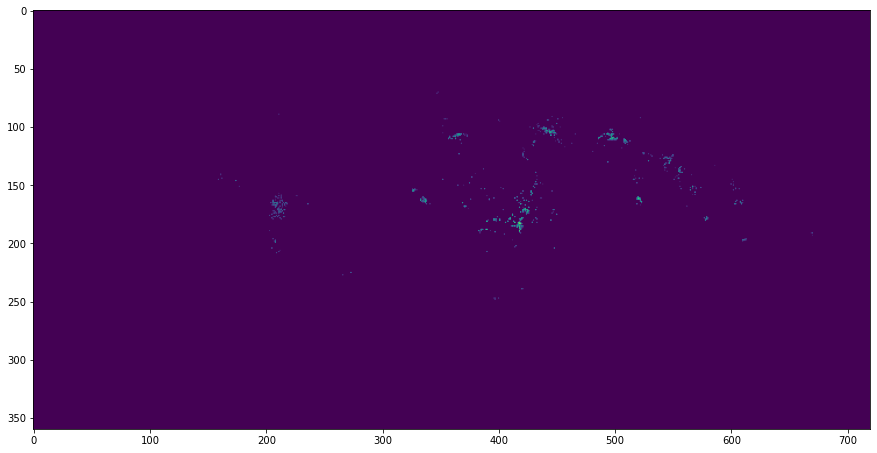

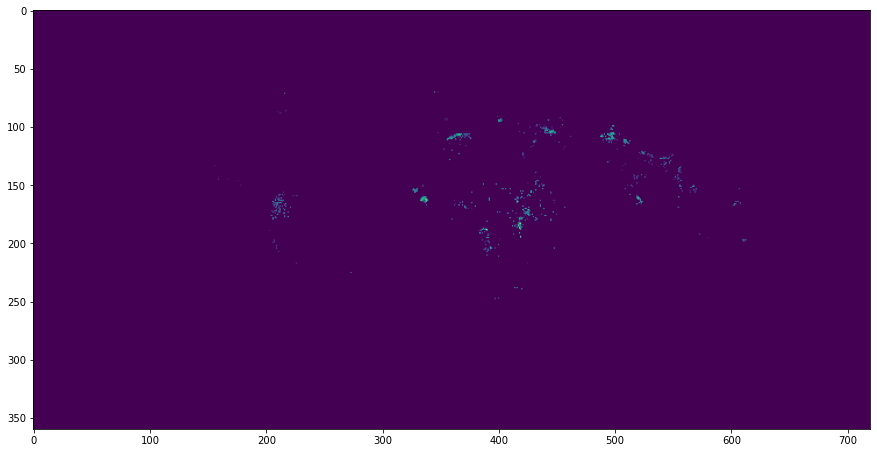

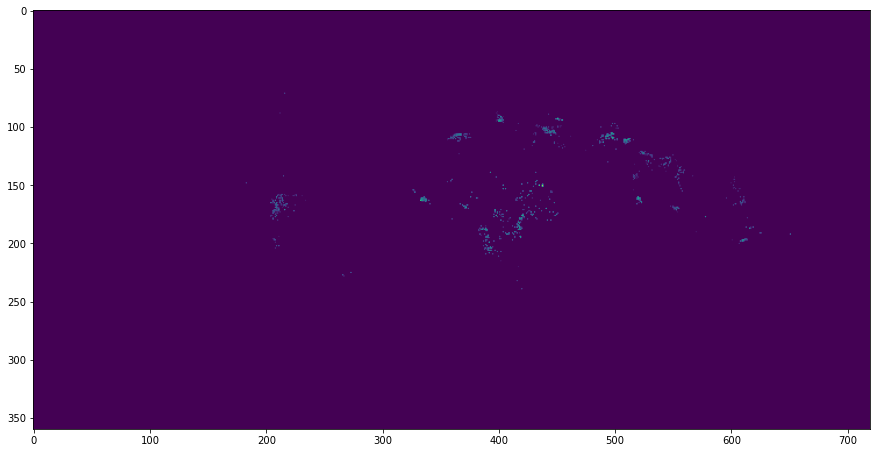

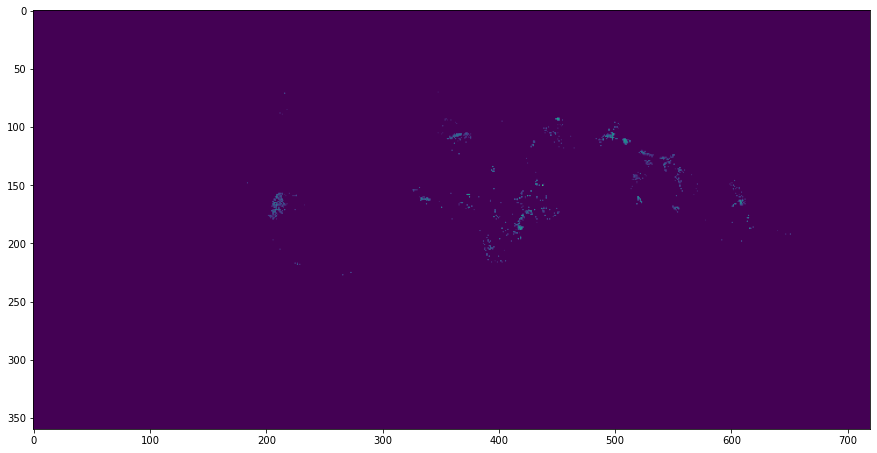

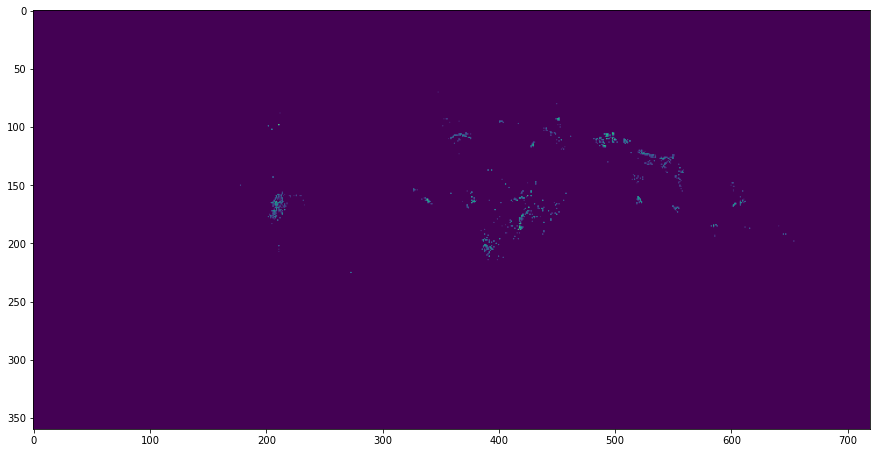

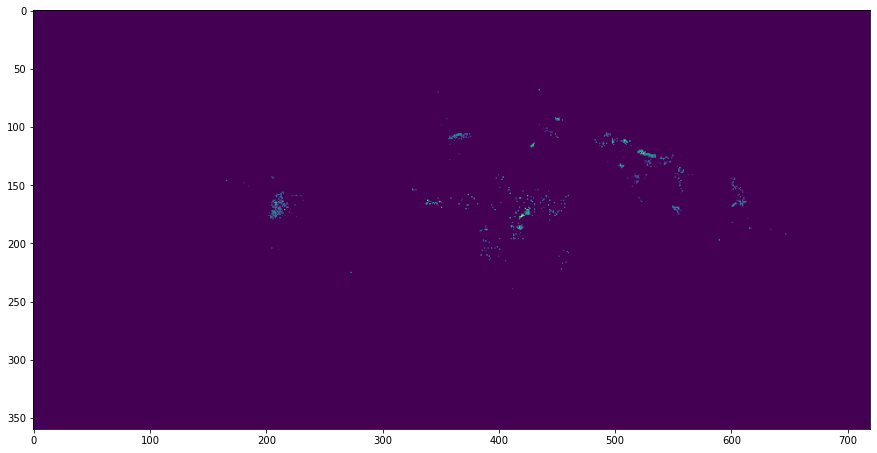

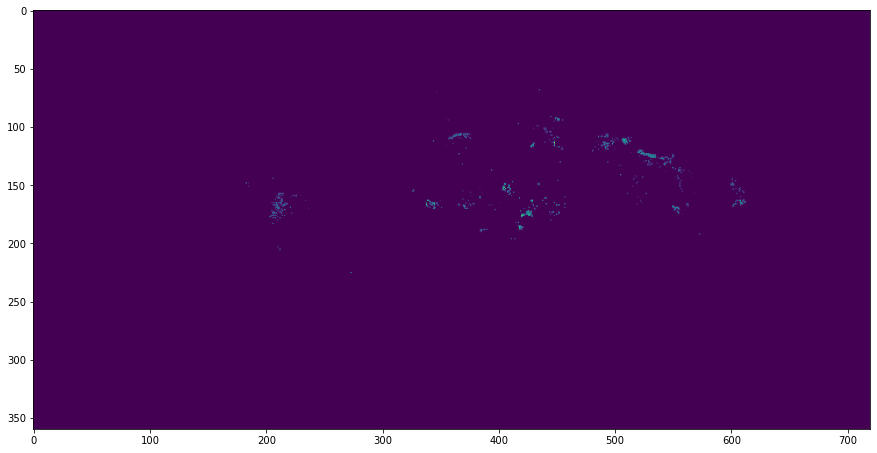

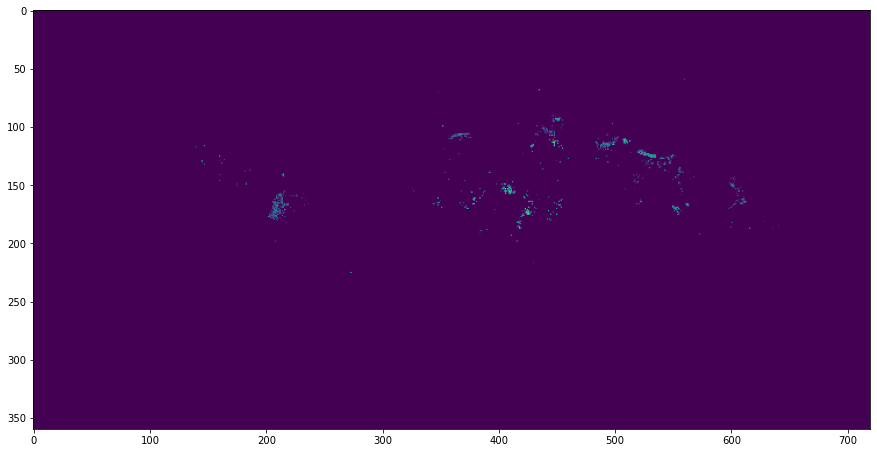

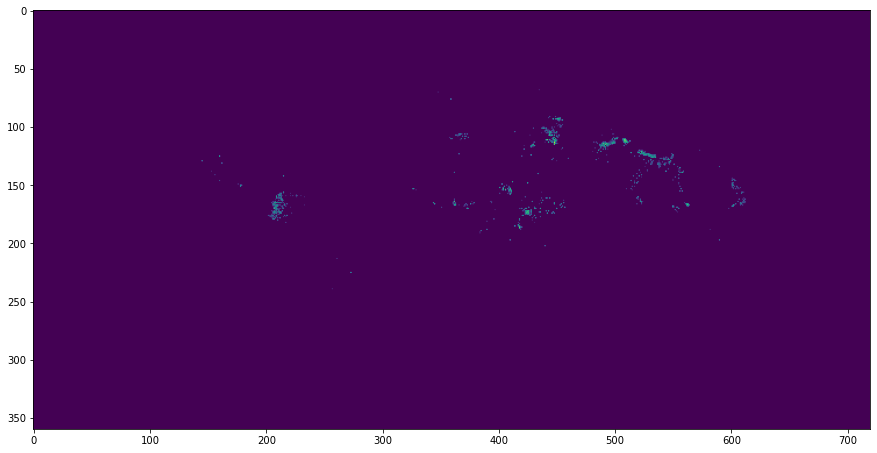

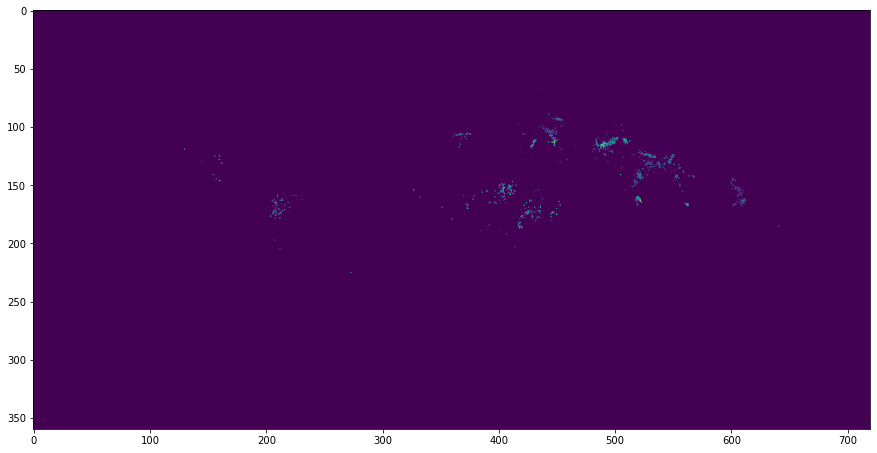

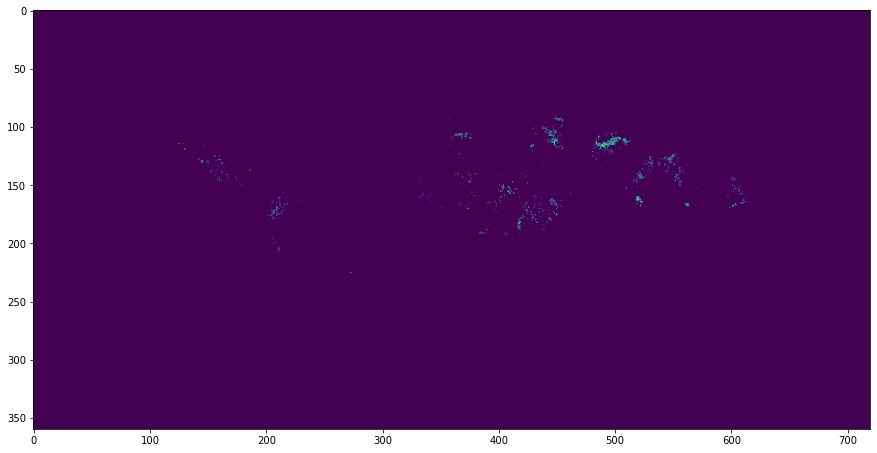

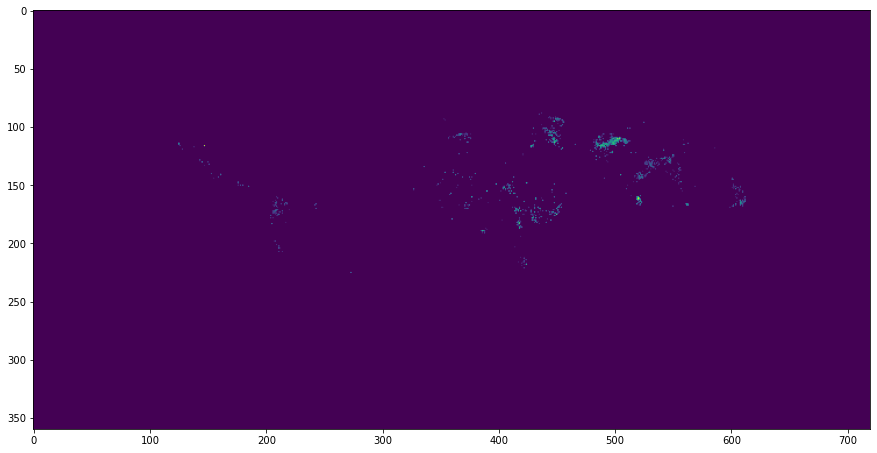

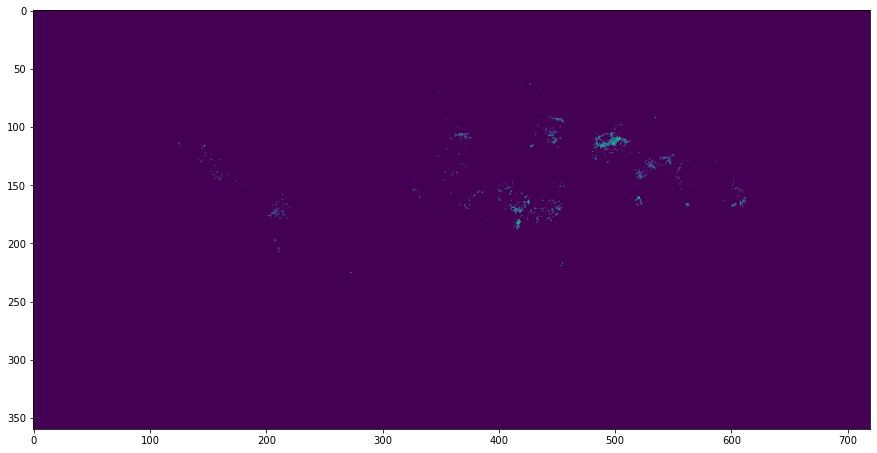

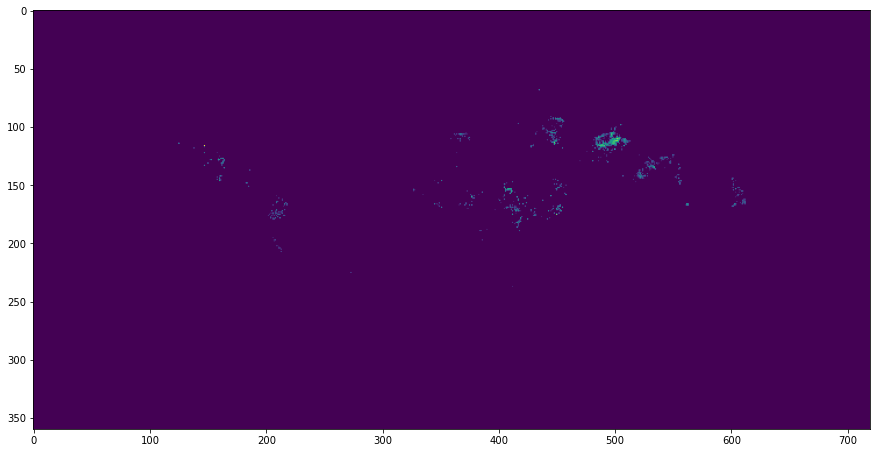

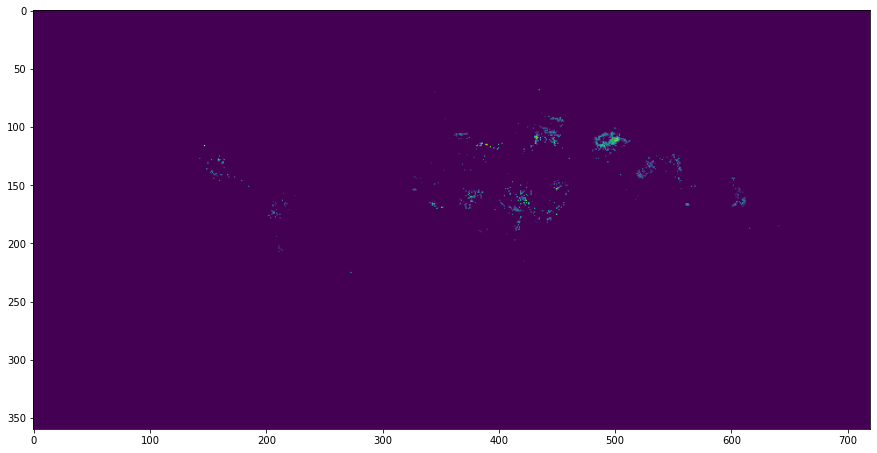

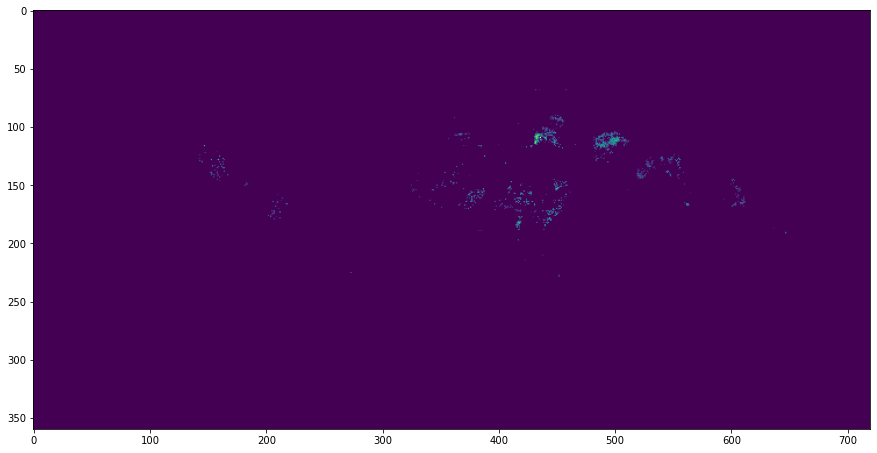

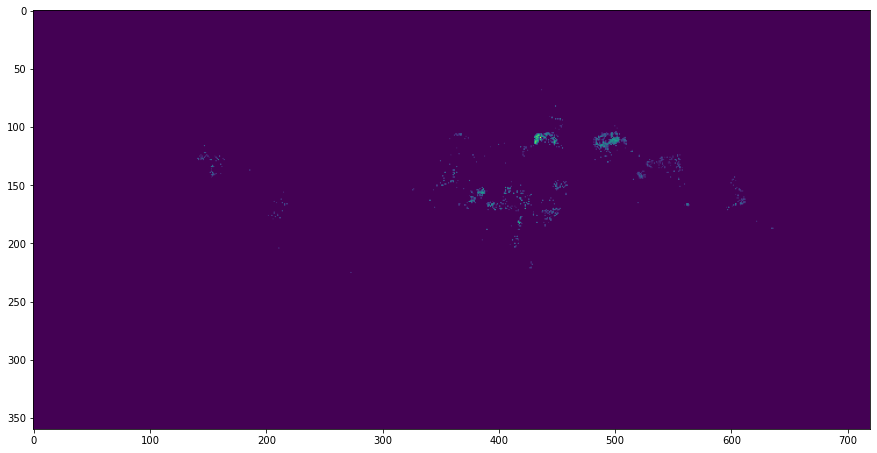

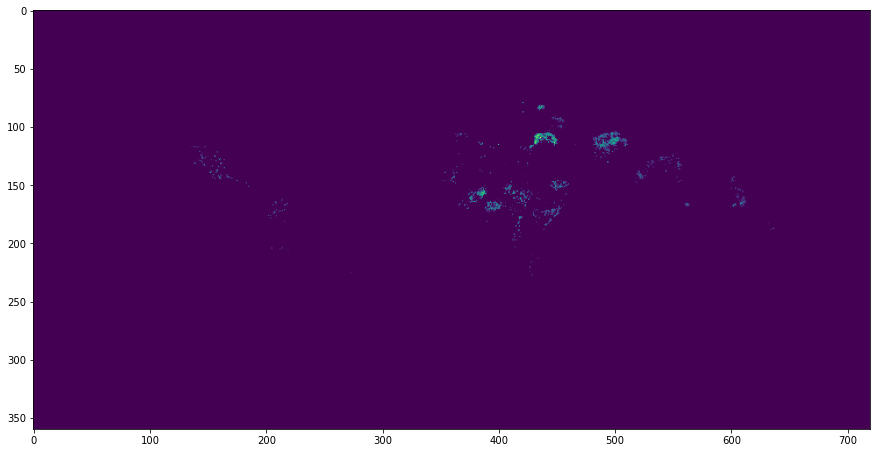

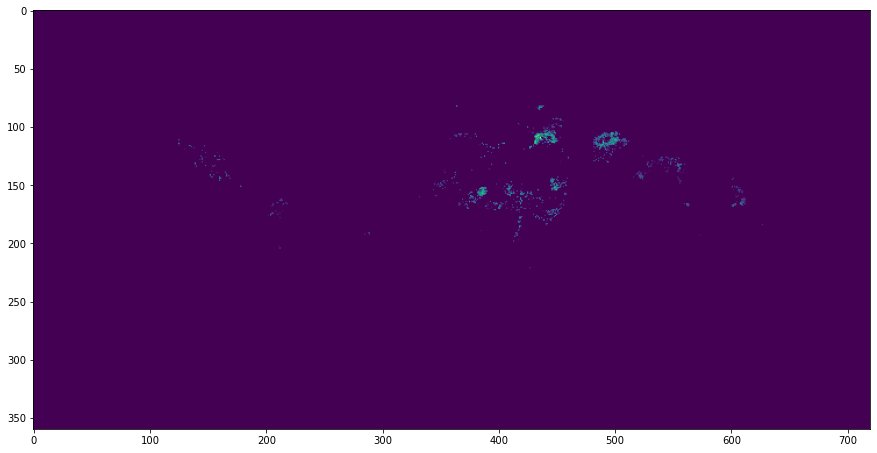

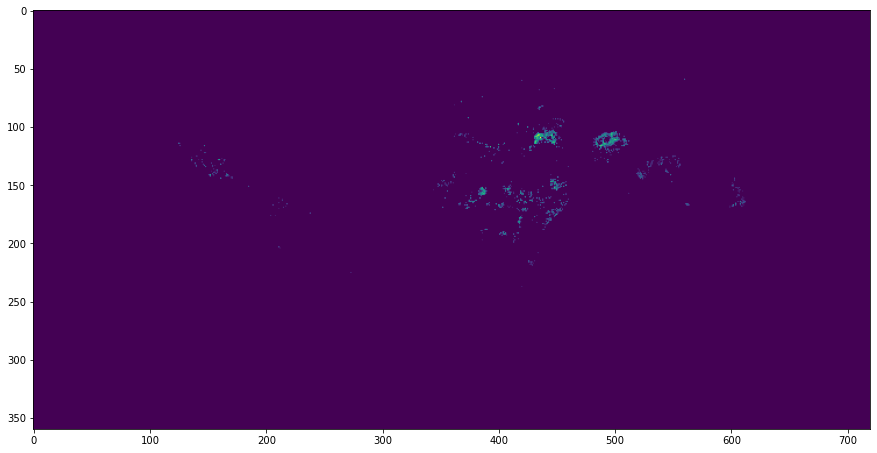

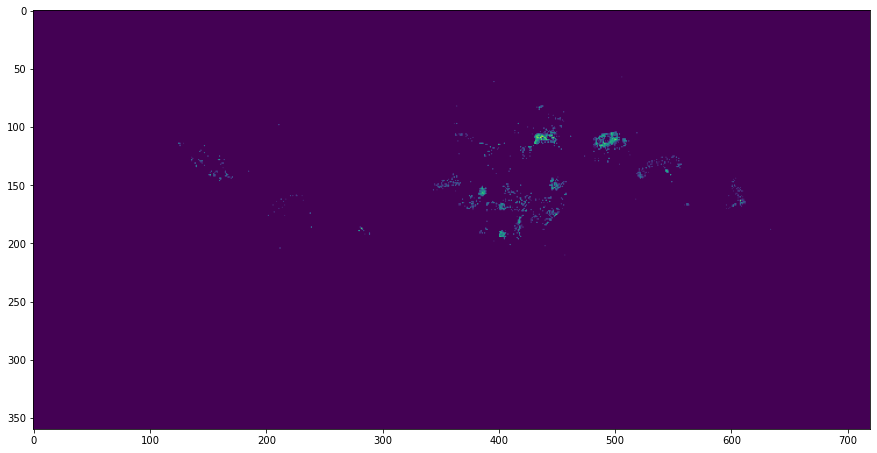

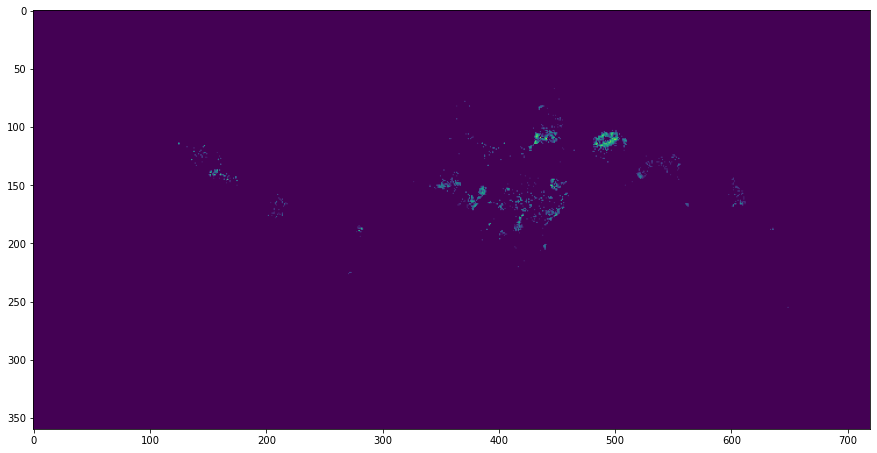

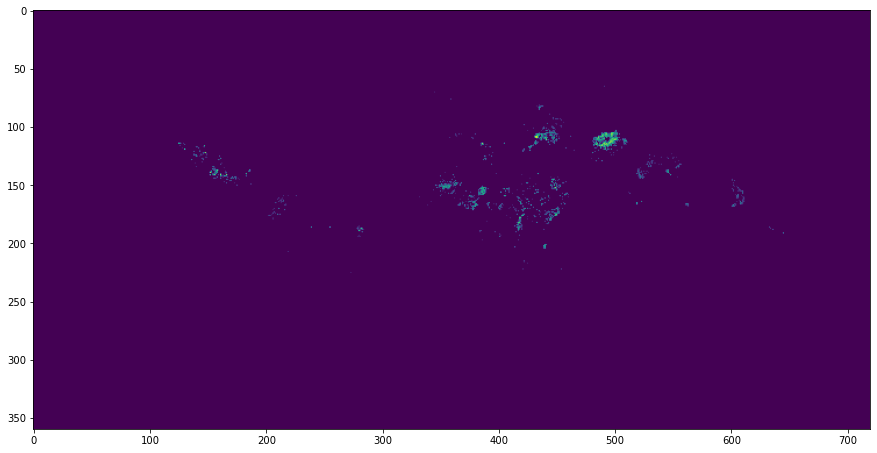

In [32]:
for i in np.arange(ucpd_vol.shape[0]):

    plt.figure(figsize = [15,15])
    plt.imshow(ucpd_vol[i,:,:,5])
    plt.show()